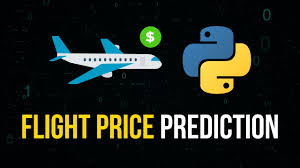

# DATA PREPROCESSING :

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

ECONOMY DATASET :

In [ ]:
eco_df=pd.read_csv('/content/economy - Copy.csv')
eco_df['class'] = 'Economy'

In [ ]:
eco_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709.0,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157.0,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764.0,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995.0,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963.0,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


In [ ]:
eco_df.shape

(206774, 12)

In [ ]:
eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        206774 non-null  object 
 1   airline     206774 non-null  object 
 2   ch_code     206773 non-null  object 
 3   num_code    206767 non-null  float64
 4   dep_time    206768 non-null  object 
 5   from        206770 non-null  object 
 6   time_taken  206772 non-null  object 
 7   stop        206768 non-null  object 
 8   arr_time    206770 non-null  object 
 9   to          206772 non-null  object 
 10  price       206774 non-null  object 
 11  class       206774 non-null  object 
dtypes: float64(1), object(11)
memory usage: 18.9+ MB


In [ ]:
eco_df.isnull().sum()

,0
date,0
airline,0
ch_code,1
num_code,7
dep_time,6
from,4
time_taken,2
stop,6
arr_time,4
to,2


remove null values from the dataframe

In [ ]:
eco_df = eco_df.dropna()
eco_df.isnull().sum()

,0
date,0
airline,0
ch_code,0
num_code,0
dep_time,0
from,0
time_taken,0
stop,0
arr_time,0
to,0


In [ ]:
eco_df.shape

(206743, 12)

In [ ]:
eco_df['stop'].value_counts()

,count
stop,
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t,162088
non-stop,27940
2+-stop,12203
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t,1063
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t,588
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t,432
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t,381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t,321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t,284


In [ ]:
# Using .str.split() and .str.strip() to clean the column directly
eco_df['stop'] = eco_df['stop'].str.split('\n').str[0].str.strip()
eco_df.head(4)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709.0,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157.0,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764.0,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995.0,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy


In [ ]:
eco_df['stop'].value_counts()

,count
stop,
1-stop,166600
non-stop,27940
2+-stop,12203


BUSINESS DATASET :

In [ ]:
bus_df=pd.read_csv('/content/business - Copy.csv')
bus_df['class'] = 'Business'

In [ ]:
bus_df.head(3)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868.0,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624.0,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531.0,20:00,NaN,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business


In [ ]:
bus_df.shape

(93487, 12)

In [ ]:
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        93487 non-null  object 
 1   airline     93487 non-null  object 
 2   ch_code     93487 non-null  object 
 3   num_code    93485 non-null  float64
 4   dep_time    93483 non-null  object 
 5   from        93479 non-null  object 
 6   time_taken  93480 non-null  object 
 7   stop        93481 non-null  object 
 8   arr_time    93482 non-null  object 
 9   to          93480 non-null  object 
 10  price       93481 non-null  object 
 11  class       93487 non-null  object 
dtypes: float64(1), object(11)
memory usage: 8.6+ MB


In [ ]:
bus_df.isnull().sum()

,0
date,0
airline,0
ch_code,0
num_code,2
dep_time,4
from,8
time_taken,7
stop,6
arr_time,5
to,7


In [ ]:
bus_df = bus_df.dropna()
bus_df.isnull().sum()

,0
date,0
airline,0
ch_code,0
num_code,0
dep_time,0
from,0
time_taken,0
stop,0
arr_time,0
to,0


In [ ]:
bus_df.shape

(93445, 12)

In [ ]:
bus_df['stop'].value_counts()

,count
stop,
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t,81455
non-stop,8095
2+-stop,1083
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t,810
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t,775
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t,257
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t,242
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t,152
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t,93


In [ ]:
# Using .str.split() and .str.strip() to clean the column directly
bus_df['stop'] = bus_df['stop'].str.split('\n').str[0].str.strip()
bus_df.head(4)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868.0,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624.0,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
3,11-02-2022,Air India,AI,839.0,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544.0,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,"46,690",Business


In [ ]:
bus_df['stop'].value_counts()

,count
stop,
1-stop,84267
non-stop,8095
2+-stop,1083


Merging the two datasets :

In [ ]:
df=pd.concat([eco_df,bus_df],ignore_index=True)

In [ ]:
df.head(3)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709.0,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157.0,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764.0,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy


In [ ]:
df.shape

(300188, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300188 entries, 0 to 300187
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        300188 non-null  object 
 1   airline     300188 non-null  object 
 2   ch_code     300188 non-null  object 
 3   num_code    300188 non-null  float64
 4   dep_time    300188 non-null  object 
 5   from        300188 non-null  object 
 6   time_taken  300188 non-null  object 
 7   stop        300188 non-null  object 
 8   arr_time    300188 non-null  object 
 9   to          300188 non-null  object 
 10  price       300188 non-null  object 
 11  class       300188 non-null  object 
dtypes: float64(1), object(11)
memory usage: 27.5+ MB


Dropping unnecessary columns :

In [ ]:
df=df.drop(columns=['ch_code','num_code'])

In [ ]:
df.isnull().sum()

,0
date,0
airline,0
dep_time,0
from,0
time_taken,0
stop,0
arr_time,0
to,0
price,0
class,0


Converting the 'dep_time' (departure time) and 'arr_time' (arrival time) columns into time-of-day categories such as 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', and 'Late Night' to enhance interpretability and improve the model's inference.

In [ ]:
df['dep_time'] = df['dep_time'].astype(str)
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M').dt.time

df['arr_time'] = df['arr_time'].astype(str)
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H:%M').dt.time

def categorize_time(time):
  if 0 <= time.hour < 3:
    return "Late Night"
  elif 3 <= time.hour < 7:
    return "Early Morning"
  elif 8 <= time.hour < 12:
    return "Morning"
  elif 12 <= time.hour < 16:
    return "Afternoon"
  elif 16 <= time.hour < 20:
    return "Evening"
  else:
    return "Night"

df['dep_time'] = df['dep_time'].apply(categorize_time)
df['arr_time'] = df['arr_time'].apply(categorize_time)
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,Evening,Delhi,02h 10m,non-stop,Night,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,Early Morning,Delhi,02h 20m,non-stop,Morning,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,Early Morning,Delhi,02h 10m,non-stop,Early Morning,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,Morning,Delhi,02h 15m,non-stop,Afternoon,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,Morning,Delhi,02h 20m,non-stop,Morning,Mumbai,"5,955",Economy


Converting the time taken column into less than 2 hours , 2-4 hours , 4-6 hours ,6-8 hours and more than 8 hours.

In [ ]:
def categorize_duration(items):
  try:
    if int(items[0:2]) < 2:
      return 'Less than 2 hours'
    if int(items[0:2]) <= 4:
      return '2-4 hours'
    if int(items[0:2]) < 6:
      return '4-6 hours'
    if int(items[0:2]) <= 8:
      return '6-8 hours'
    if int(items[0:2]) > 8:
      return 'More than 8 hours'
  except:
    return 'More than 8 hours'

df['time_taken'] = df['time_taken'].apply(categorize_duration)
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,Evening,Delhi,2-4 hours,non-stop,Night,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,Early Morning,Delhi,2-4 hours,non-stop,Morning,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,Early Morning,Delhi,2-4 hours,non-stop,Early Morning,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,Morning,Delhi,2-4 hours,non-stop,Afternoon,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,Morning,Delhi,2-4 hours,non-stop,Morning,Mumbai,"5,955",Economy


In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127839
Air India,80862
Indigo,43120
GO FIRST,23165
AirAsia,16089
SpiceJet,9011
StarAir,61
Trujet,41


In [ ]:
df['from'].value_counts()

,count
from,
Delhi,61291
Mumbai,60903
Bangalore,52088
Kolkata,46346
Hyderabad,40860
Chennai,38700


In [ ]:
df['to'].value_counts()

,count
to,
Mumbai,59048
Delhi,57360
Bangalore,51112
Kolkata,49533
Hyderabad,42776
Chennai,40359


remove , from price

In [ ]:
df['price'] = df['price'].astype(str).str.replace(',', '').astype(float)

#DATA VISUALISATION :

In [ ]:
df.head(2)

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,Evening,Delhi,2-4 hours,non-stop,Night,Mumbai,5953.0,Economy
1,11-02-2022,SpiceJet,Early Morning,Delhi,2-4 hours,non-stop,Morning,Mumbai,5953.0,Economy


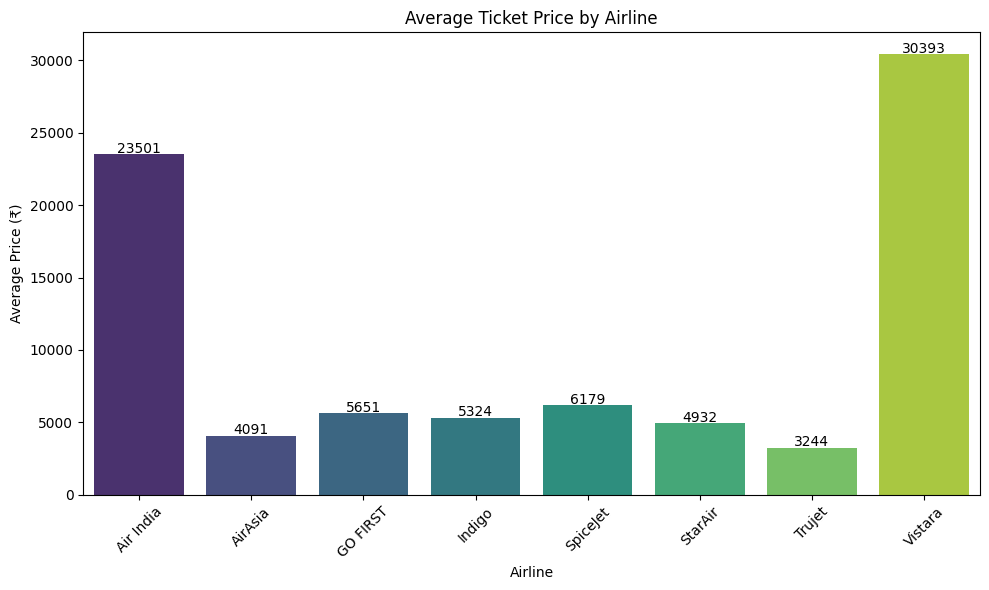

In [ ]:
grouped = df.groupby('airline')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=grouped, x='airline', y='price', palette='viridis')
for index, row in grouped.iterrows():
    barplot.text(index, row['price'] + 100, f"{int(row['price'])}",
                 color='black', ha="center", fontsize=10)
plt.title('Average Ticket Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar graph illustrates the variation in flight prices across different airlines, with **Vistara** having the **highest** fare and **Trujet** offering the **lowest**.

Text(0.5, 1.0, 'Average Business class price for airlines')

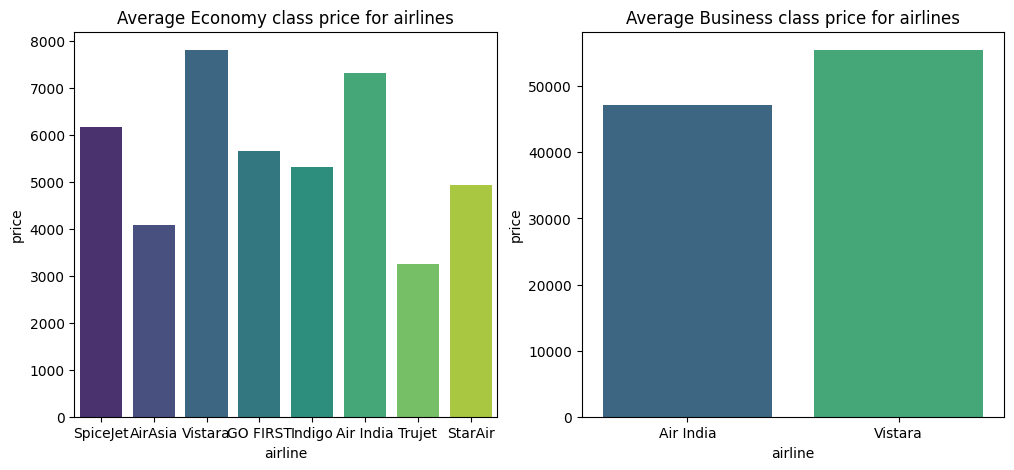

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
eco_df=df[df['class']=='Economy']
bus_df=df[df['class']=='Business']
sns.barplot(x='airline', y='price', data=eco_df, palette='viridis', ci=None, legend=False, ax=ax[0])
ax[0].set_title('Average Economy class price for airlines')
sns.barplot(x='airline', y='price', data=bus_df, palette='viridis', ci=None, legend=False, ax=ax[1])
ax[1].set_title('Average Business class price for airlines')

The graphs depict a significant disparity in flight prices between economy and business class across different airlines.

In both classes, **Vistara** offers the **highest** fares, while **Trujet** and **AirAsia** have the **lowest** average prices in **economy class**.

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['days_left'] = (df['date'].max() - df['date']).dt.days

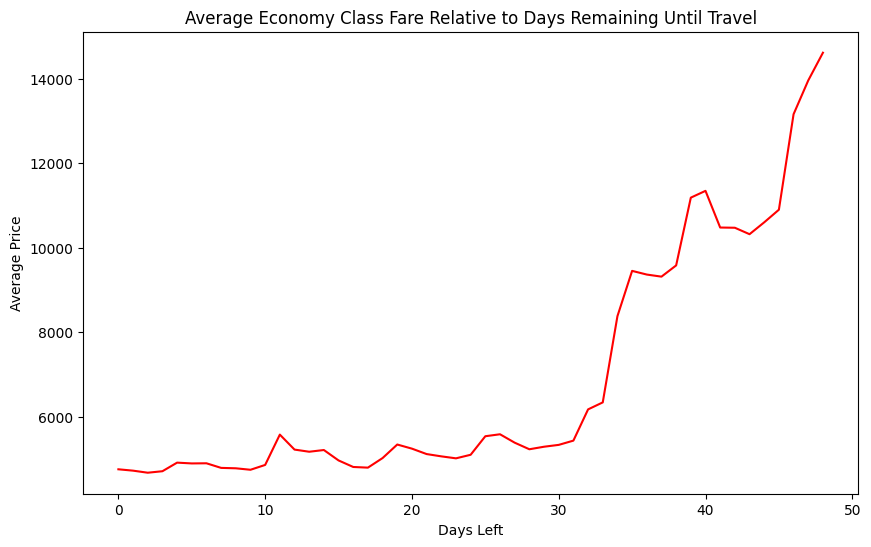

In [ ]:
plt.figure(figsize=(10, 6))
economy_df_sorted = df[df['class'] == 'Economy'].sort_values(by='days_left')
sns.lineplot(x='days_left', y='price', data=economy_df_sorted, errorbar=None, color='red')
plt.title('Average Economy Class Fare Relative to Days Remaining Until Travel')
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.show()

*The graph illustrates the trend of **increasing** average economy class fares as the departure date approaches. This phenomenon can be attributed to rising demand and limited availability.*

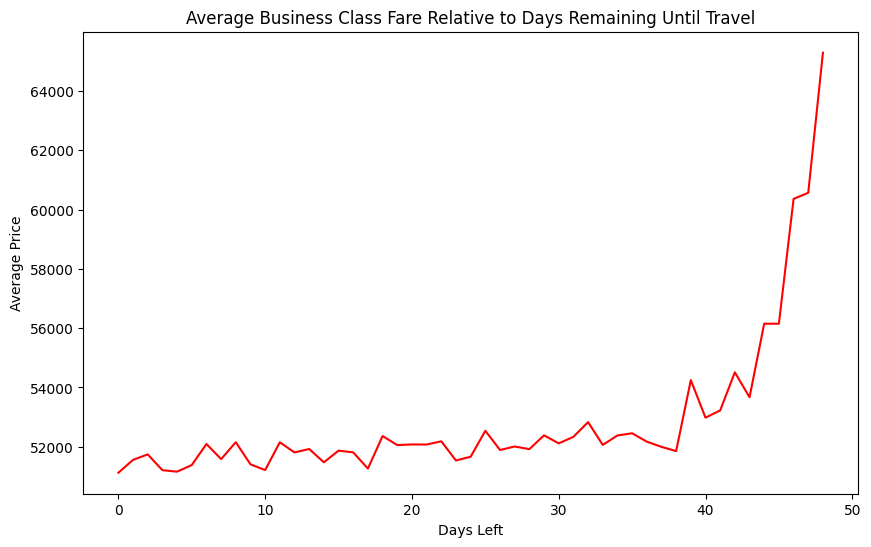

In [ ]:
plt.figure(figsize=(10, 6))
business_df_sorted = df[df['class'] == 'Business'].sort_values(by='days_left')
sns.lineplot(x='days_left', y='price', data=business_df_sorted, errorbar=None, color='red')
plt.title('Average Business Class Fare Relative to Days Remaining Until Travel')
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.show()

*The graph illustrates the trend of **increasing** average bussiness class fares as the departure date approaches. This phenomenon can be attributed to rising demand and limited availability.*

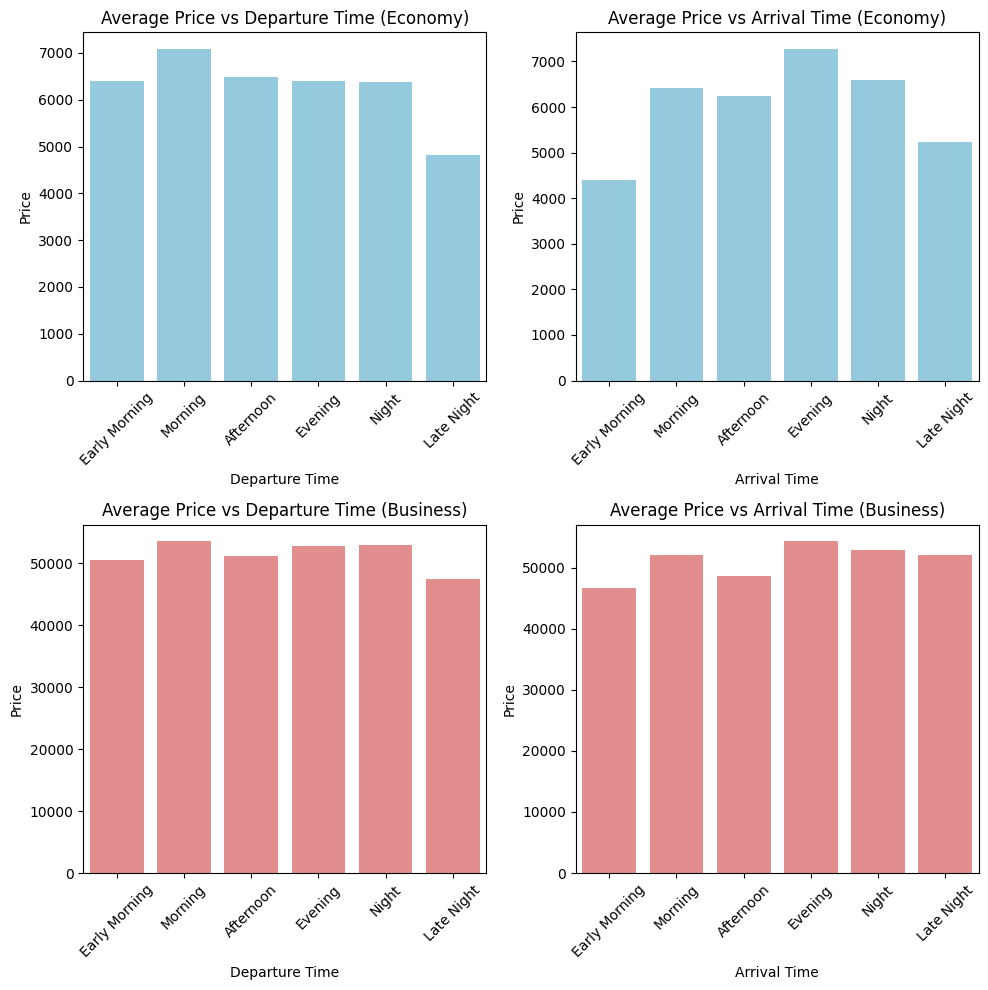

In [ ]:
eco_df = df[df['class'] == 'Economy']
eco_df_grouped_dep = eco_df.groupby('dep_time')['price'].mean().reset_index()
eco_df = df[df['class'] == 'Economy']
eco_df_grouped_arr = eco_df.groupby('arr_time')['price'].mean().reset_index()

bus_df = df[df['class'] == 'Business']
bus_df_grouped_dep = bus_df.groupby('dep_time')['price'].mean().reset_index()
bus_df = df[df['class'] == 'Business']
bus_df_grouped_arr = bus_df.groupby('arr_time')['price'].mean().reset_index()

order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x='dep_time', y='price', data=eco_df_grouped_dep, order=order, ax=ax[0,0], color='skyblue')
ax[0,0].set_title('Average Price vs Departure Time (Economy)')
ax[0,0].set_xlabel('Departure Time')
ax[0,0].set_ylabel('Price')
ax[0,0].tick_params(axis='x', rotation=45)
sns.barplot(x='arr_time', y='price', data=eco_df_grouped_arr, order=order, ax=ax[0,1], color='skyblue')
ax[0,1].set_title('Average Price vs Arrival Time (Economy)')
ax[0,1].set_xlabel('Arrival Time')
ax[0,1].set_ylabel('Price')
ax[0,1].tick_params(axis='x', rotation=45)

sns.barplot(x='dep_time', y='price', data=bus_df_grouped_dep, order=order, ax=ax[1,0], color='lightcoral')
ax[1,0].set_title('Average Price vs Departure Time (Business)')
ax[1,0].set_xlabel('Departure Time')
ax[1,0].set_ylabel('Price')
ax[1,0].tick_params(axis='x', rotation=45)
sns.barplot(x='arr_time', y='price', data=bus_df_grouped_arr, order=order, ax=ax[1,1], color='lightcoral')
ax[1,1].set_title('Average Price vs Arrival Time (Business)')
ax[1,1].set_xlabel('Arrival Time')
ax[1,1].set_ylabel('Price')
ax[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Economy**

*Flights departing **early morning** tend to be cheaper than those leaving later in the day whereas flights arriving **late night** often have lower prices compared to those arriving earlier.*

**Business**

*Business class flights departing in the **early morning** tend to have slightly lower prices compared to other departure times and those arriving in the **early morning** show a slight decrease in average prices compared to later arrival times.*

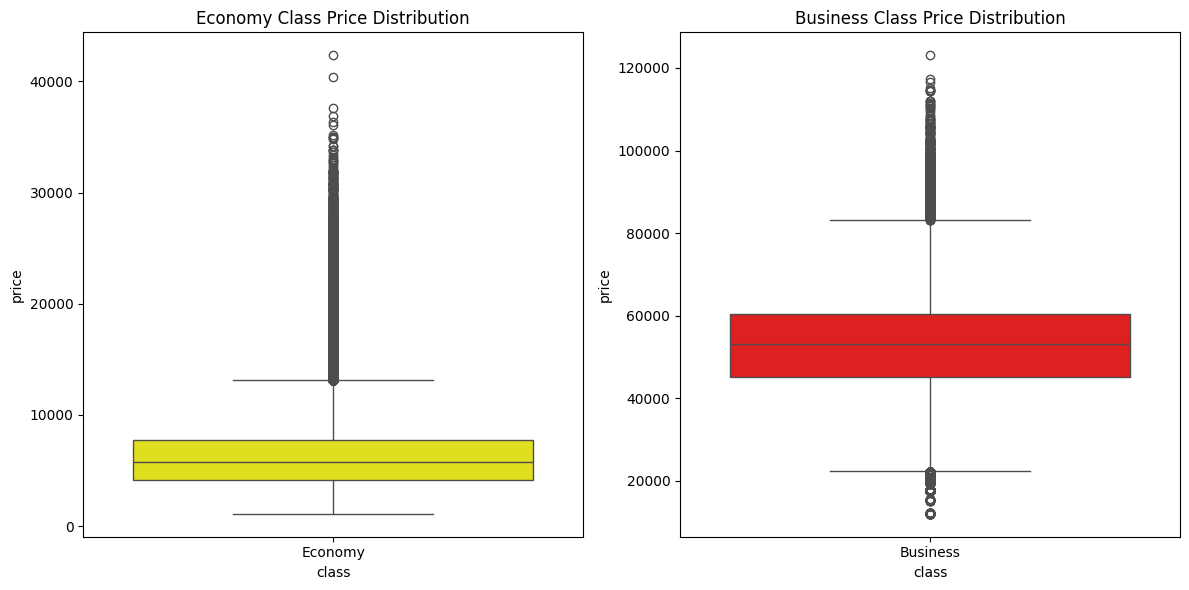

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='class', y='price', data=df[df['class'] == 'Economy'], color='yellow', ax=ax[0])
ax[0].set_title('Economy Class Price Distribution')
sns.boxplot(x='class', y='price', data=df[df['class'] == 'Business'], color='red', ax=ax[1])
ax[1].set_title('Business Class Price Distribution')
plt.tight_layout()
plt.show()

**Economy class:**

*The distribution is **skewed** to the **right**, with a **longer tail** on the **higher-priced side**. This suggests that there are some economy class tickets with prices considerably higher than the median.
There are some **outliers** on the **higher-priced side**, represented by the individual dots. These could be due to factors like last-minute bookings, peak travel times, or specific routes with higher demand.*

**Business class:**

*The distribution is **more compact**, with a **shorter tail** on the **higher-priced side**. This indicates that there is less variation in prices among business class tickets compared to economy class.*
*There are a **few outliers** on both the lower and higher-priced sides.*

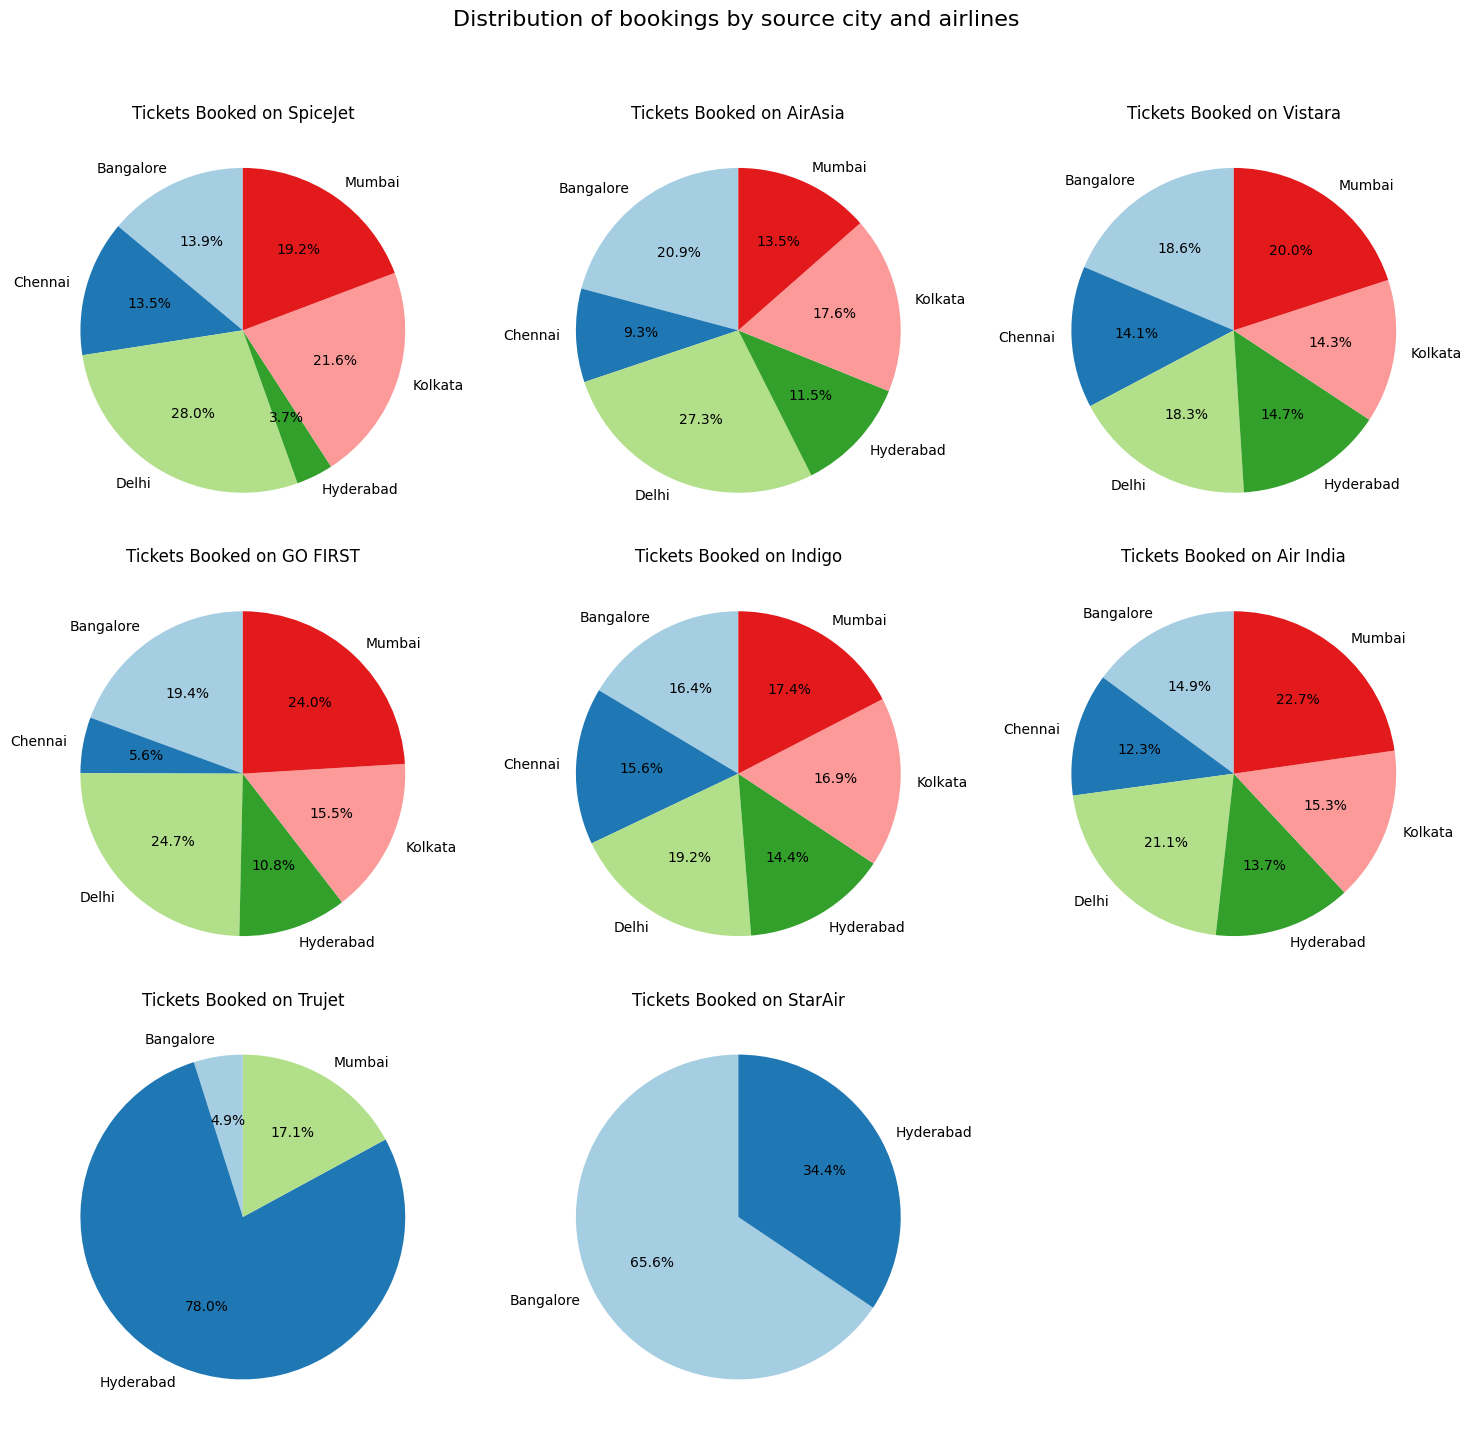

In [ ]:
city_airline_proportions = df.groupby(['from', 'airline'])['airline'].count().unstack()
airlines = df['airline'].unique()
cols = 3
rows = math.ceil(len(airlines) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
fig.suptitle('Distribution of bookings by source city and airlines', fontsize=16)
axes = axes.flatten()
for i, airline in enumerate(airlines):
    ax = axes[i]
    airline_data = city_airline_proportions[airline].dropna()
    if airline_data.sum() == 0:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')
        ax.set_title(f'{airline} (No Data)')
        ax.axis('off')
        continue
    ax.pie(airline_data, labels=airline_data.index, startangle=90, colors=plt.cm.Paired.colors, autopct='%1.1f%%')
    ax.set_title(f'Tickets Booked on {airline}', fontsize=12)
for j in range(len(airlines), len(axes)):
    axes[j].axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

*The pie charts consistently show that the four major metropolitan cities in India—**Mumbai, Bangalore, Delhi,** and **Kolkata**—dominate ticket bookings for all six airlines.*

*Moreover, **Mumbai** tends to have the largest market share across most airlines, suggesting it might be a popular departure or arrival point for domestic flights. **Bangalore** and **Delhi** often occupy the second and third positions, indicating significant demand from these cities.*

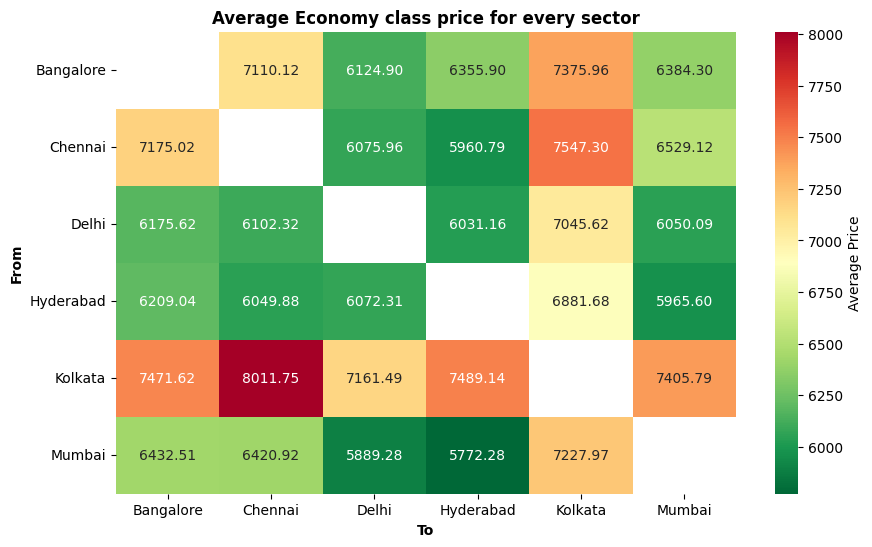

In [ ]:
heatmap_data = df[df['class'] == 'Economy'].groupby(['from', 'to'])['price'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn_r",cbar_kws={'label': 'Average Price'})
plt.xlabel('To', fontweight='bold')
plt.ylabel('From', fontweight='bold')
plt.yticks(rotation=0)
plt.title('Average Economy class price for every sector', fontweight='bold')
plt.show()

*Routes involving **Kolkata** often have higher prices, particularly when traveling to **Bangalore** or **Mumbai**. Routes involving **Delhi** tend to have some of the most affordable economy class fares, especially when traveling to **Chennai**, **Hyderabad**, or **Kolkata**.*


*The heatmap also reveals **regional trends**. For instance, flights within the southern region (Bangalore, Chennai, Hyderabad) tend to have lower prices compared to routes involving northern cities like Delhi and Kolkata.*

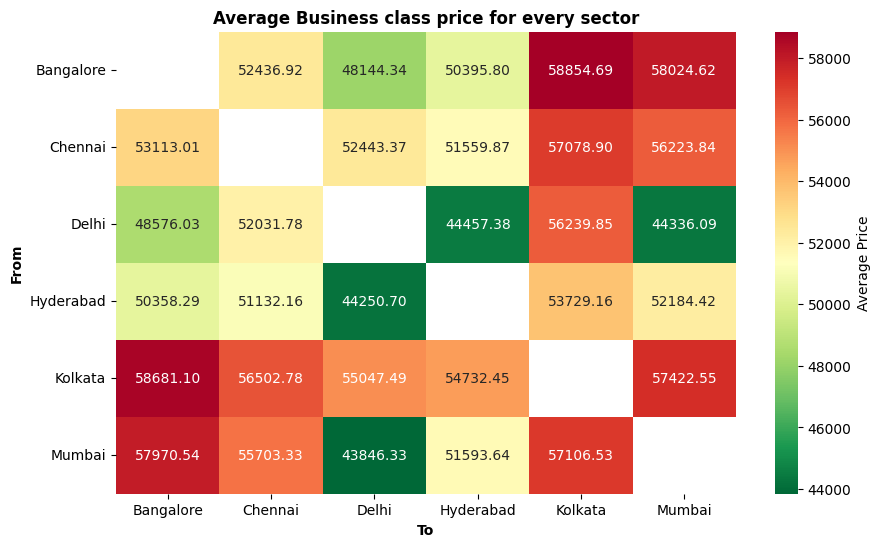

In [ ]:
heatmap_data = df[df['class'] == 'Business'].groupby(['from', 'to'])['price'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn_r",cbar_kws={'label': 'Average Price'})
plt.xlabel('To', fontweight='bold')
plt.ylabel('From', fontweight='bold')
plt.yticks(rotation=0)
plt.title('Average Business class price for every sector', fontweight='bold')
plt.show()

*The route from **Bangalore** to **Kolkata** appears to be the most expensive, suggesting it might be a popular route with high demand or limited competition.Routes between **Hyderabad** and **Delhi** in both directions, as well as between **Mumbai** and **Delhi**, offer relatively affordable business class travel.*

*The **regional trend** followed by the average economy class prices can also be observed here.*

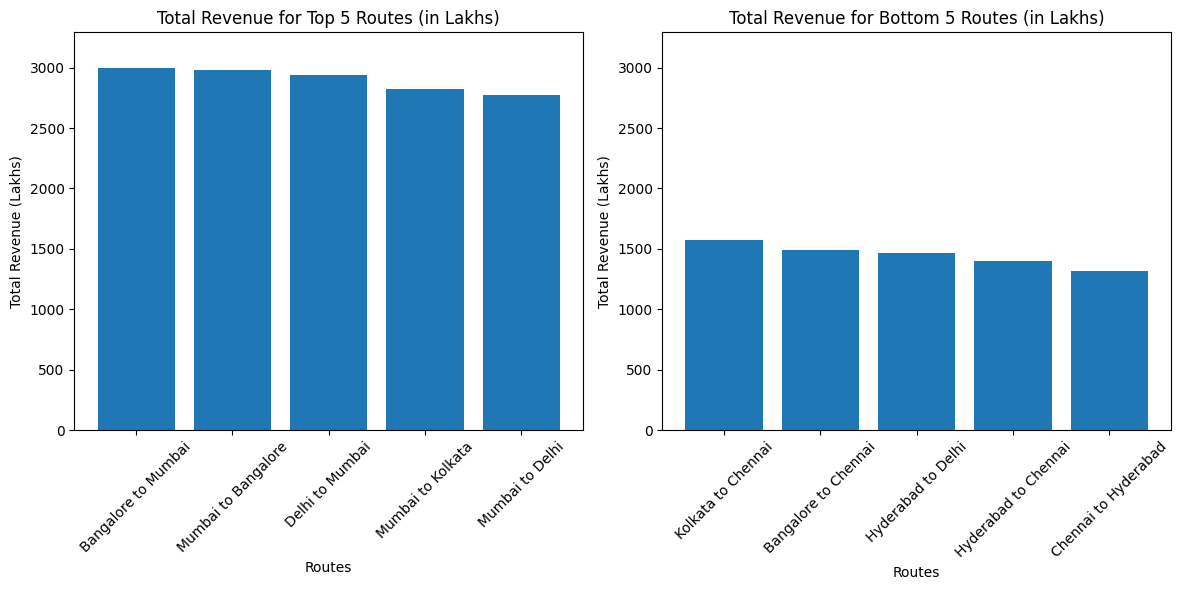

In [ ]:
route_revenue = df.groupby(['from', 'to'])['price'].sum().sort_values(ascending=False)
top_5_routes = route_revenue.head(5)
bottom_5_routes = route_revenue.tail(5)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(top_5_routes.index.map(lambda x: f"{x[0]} to {x[1]}"), top_5_routes.values / 100000)
ax[0].set_title('Total Revenue for Top 5 Routes (in Lakhs)')
ax[0].set_xlabel('Routes')
ax[0].set_ylabel('Total Revenue (Lakhs)')
ax[0].tick_params(axis='x', rotation=45)
ax[1].bar(bottom_5_routes.index.map(lambda x: f"{x[0]} to {x[1]}"), bottom_5_routes.values / 100000)
ax[1].set_title('Total Revenue for Bottom 5 Routes (in Lakhs)')
ax[1].set_xlabel('Routes')
ax[1].set_ylabel('Total Revenue (Lakhs)')
ax[1].tick_params(axis='x', rotation=45)

y_max = max(max(top_5_routes.values) / 100000, max(bottom_5_routes.values) / 100000)
ax[0].set_ylim(0, y_max * 1.1)
ax[1].set_ylim(0, y_max * 1.1)

plt.tight_layout()
plt.show()

**Top 5 Routes:**
* **Bangalore** to **Mumbai** is the most profitable route, generating the highest total revenue.
* The routes **Mumbai** to **Bangalore**, **Delhi** to **Mumbai**, **Mumbai** to **Kolkata**, and **Mumbai** to **Delhi** also rank among the top 5 revenue-generating routes.

**Bottom 5 Routes:**

* **Kolkata** to **Chennai** is the least profitable route among the bottom 5.
* Other routes with lower revenue include **Bangalore** to **Chennai**, **Hyderabad** to **Delhi**, **Hyderabad** to **Chennai**, and **Chennai** to **Hyderabad**.

<Axes: xlabel='stop', ylabel='price'>

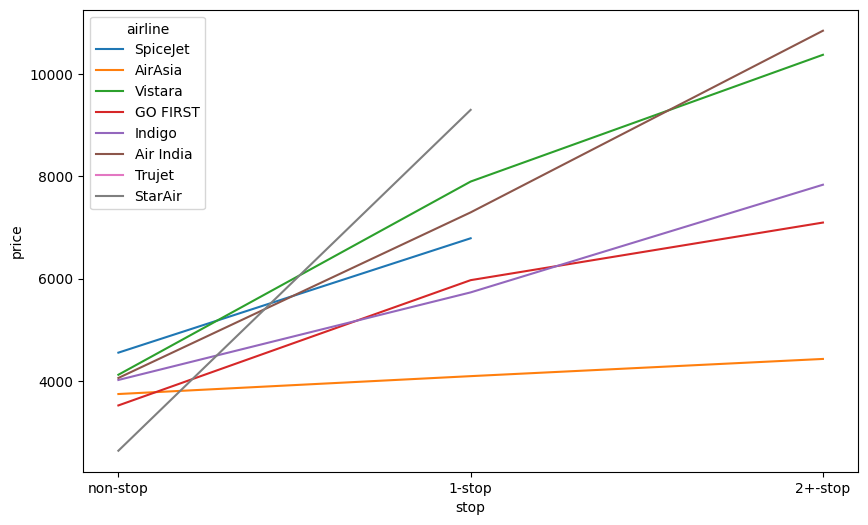

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['class']=='Economy'],x='stop',y='price',hue='airline',errorbar=None)

*Based on the line plot, it can be inferred that **all airlines** exhibit a **general trend of increasing flight prices** as the **number of stops increases**. This suggests that passengers may expect to pay more for flights with layovers or connections compared to non-stop flights.*

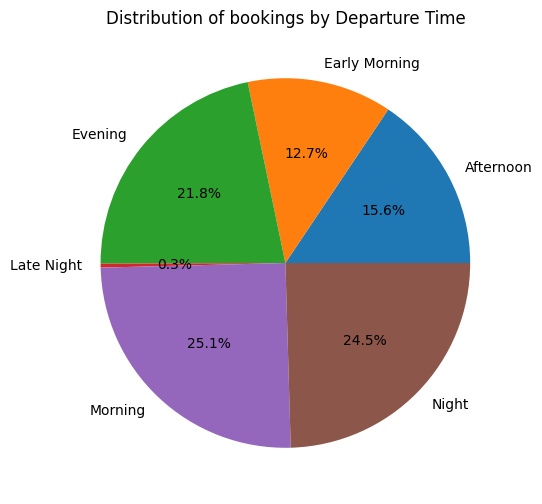

In [ ]:
df_counts = df.groupby('dep_time')['from'].count()

plt.figure(figsize=(8, 6))
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%')
plt.title('Distribution of bookings by Departure Time')
plt.show()

*The highest number of flights depart in the **morning**, accounting for **25.1%** of all departures. **Evening** and **early morning** flights also have a considerable presence, with **21.8%** and **20.0%** respectively. **Afternoon** and **night** flights have moderate activity levels at **15.6%** and **16.5%**. Late night flights are the least frequent, representing only **0.3%** of departures.*

#Modelling :

Label Encoding :
Converting categorical variables into numerical format, allowing machine learning algorithms to process and interpret the data effectively.

In [ ]:
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left
0,2022-02-11,SpiceJet,Evening,Delhi,2-4 hours,non-stop,Night,Mumbai,5953.0,Economy,48
1,2022-02-11,SpiceJet,Early Morning,Delhi,2-4 hours,non-stop,Morning,Mumbai,5953.0,Economy,48
2,2022-02-11,AirAsia,Early Morning,Delhi,2-4 hours,non-stop,Early Morning,Mumbai,5956.0,Economy,48
3,2022-02-11,Vistara,Morning,Delhi,2-4 hours,non-stop,Afternoon,Mumbai,5955.0,Economy,48
4,2022-02-11,Vistara,Morning,Delhi,2-4 hours,non-stop,Morning,Mumbai,5955.0,Economy,48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300063 entries, 0 to 300158
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300063 non-null  object
 1   airline     300063 non-null  object
 2   dep_time    300063 non-null  object
 3   from        300063 non-null  object
 4   time_taken  300063 non-null  object
 5   stop        300063 non-null  object
 6   arr_time    300063 non-null  object
 7   to          300063 non-null  object
 8   price       300063 non-null  int64 
 9   class       300063 non-null  object
 10  days_left   300063 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 27.5+ MB


In [ ]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)


In [ ]:
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class
0,10,4,2,2,0,2,5,5,5953.0,1
1,10,4,1,2,0,2,4,5,5953.0,1
2,10,1,1,2,0,2,1,5,5956.0,1
3,10,7,4,2,0,2,0,5,5955.0,1
4,10,7,4,2,0,2,4,5,5955.0,1


Defining our feature set and label :

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

Variance Inflation Factor (VIF) is used to identify and address multicollinearity in our dataset. By evaluating VIF scores, we determined which columns were highly correlated with others and might be redundant. This helped in deciding which columns to keep for a more accurate and efficient model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Features'] = X.columns
    return vif


In [ ]:
calculate_vif(X)

,VIF,Features
0,3.485423,date
1,2.431686,airline
2,3.330399,dep_time
3,2.871173,from
4,6.192806,time_taken
5,1.518502,stop
6,4.252145,arr_time
7,2.863490,to
8,2.852018,class


As the VIF for time taken is more than 5 , we decided to drop it

In [ ]:
 X=X.drop(columns=['time_taken'])

In [ ]:
vif_updated=calculate_vif(X)
vif_updated

,VIF,Features
0,3.366927,date
1,2.365826,airline
2,2.985774,dep_time
3,2.760428,from
4,1.190233,stop
5,3.700576,arr_time
6,2.746231,to
7,2.813195,class


The data is split into training, validation, and test sets, followed by model training using the optimal hyperparameters identified through Randomized Search :

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# Splitting the data into train (80%), validation (10%), and test (10%) sets:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Parameter grids for each model
param_grids = {
    'Linear Regression': {},

    'KNN Regressor': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },

    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },

    'Decision Tree': {
        'model__max_depth': [None, 5, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },

    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7, 10],
        'model__subsample': [0.6, 0.8, 1.0],
        'model__colsample_bytree': [0.6, 0.8, 1.0]
    }
}

# Model definitions
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

best_models = {}

# Looping over models and performing RandomizedSearchCV
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...\n")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    param_grid = param_grids[model_name]

    randomized_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=10,
        scoring='r2',
        refit=True,
        n_jobs=-1,
        random_state=42,
        verbose=2
    )

    randomized_search.fit(X_train, y_train)
    best_model = randomized_search.best_estimator_
    y_val_pred = best_model.predict(X_val)

    r2_val = r2_score(y_val, y_val_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    print(f"\nPerformance on Validation Data for {model_name}:")
    print(f"R2 Score (Val): {r2_val:.4f}")
    print(f"MSE (Val): {mse_val:.4f}")
    print(f"MAE (Val): {mae_val:.4f}")
    print(f"MAPE (Val): {mape_val:.4f}")

    best_models[model_name] = best_model


Tuning hyperparameters for Linear Regression...

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Performance on Validation Data for Linear Regression:
R2 Score (Val): 0.8974
MSE (Val): 53144317.1536
MAE (Val): 4984.8174
MAPE (Val): 0.4911

Tuning hyperparameters for KNN Regressor...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Performance on Validation Data for KNN Regressor:
R2 Score (Val): 0.9565
MSE (Val): 22519727.5240
MAE (Val): 2931.3134
MAPE (Val): 0.2638

Tuning hyperparameters for Random Forest...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Performance on Validation Data for Random Forest:
R2 Score (Val): 0.9645
MSE (Val): 18409431.0412
MAE (Val): 2187.8401
MAPE (Val): 0.1344

Tuning hyperparameters for Decision Tree...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Performance on Validation Data for Decision Tree:
R2 Score (Val): 0.9631
MSE (Val): 19097970.3480
MAE (Val): 2231.1394
MAPE (Val): 0.1390

Tuning hy

In [ ]:
# Combining X_train and X_val for final training
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Retraining the best model from the randomized search on the combined train+validation data
for model_name, best_model in best_models.items():
    print(f"\nRetraining {model_name} on combined train+validation data...\n")
    best_model.fit(X_train_val, y_train_val)

    # Predicting on the test data
    y_test_pred = best_model.predict(X_test)

    # Evaluating performance on test data
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    print(f"\nPerformance on Test Data for {model_name}:")
    print(f"R2 Score (Test): {r2_test:.4f}")
    print(f"MSE (Test): {mse_test:.4f}")
    print(f"MAE (Test): {mae_test:.4f}")
    print(f"MAPE (Test): {mape_test:.4f}")


Retraining Linear Regression on combined train+validation data...


Performance on Test Data for Linear Regression:
R2 Score (Test): 0.8991
MSE (Test): 51869959.0242
MAE (Test): 4943.0202
MAPE (Test): 0.4917

Retraining KNN Regressor on combined train+validation data...


Performance on Test Data for KNN Regressor:
R2 Score (Test): 0.9576
MSE (Test): 21829330.6144
MAE (Test): 2891.6002
MAPE (Test): 0.2655

Retraining Random Forest on combined train+validation data...


Performance on Test Data for Random Forest:
R2 Score (Test): 0.9645
MSE (Test): 18250234.7654
MAE (Test): 2189.3864
MAPE (Test): 0.1361

Retraining Decision Tree on combined train+validation data...


Performance on Test Data for Decision Tree:
R2 Score (Test): 0.9630
MSE (Test): 19025016.5283
MAE (Test): 2237.1998
MAPE (Test): 0.1404

Retraining XGBoost on combined train+validation data...


Performance on Test Data for XGBoost:
R2 Score (Test): 0.9638
MSE (Test): 18638199.3653
MAE (Test): 2502.8786
MAPE (Test): 0.1810

In [ ]:
print(f"Best Model: {best_model}")

In [ ]:
r2_score = r2_test
best_r2_score = r2_test
best_model_overall = model_name

if r2_test > best_r2_score:
    best_r2_score = r2_test
    best_model_overall = model_name

print(f"Best overall model: {best_model_overall} with R2 score of {best_r2_score:.4f} on test data")

**The Random Forest Regressor model exhibits the strongest performance among all evaluated models. With an R² score of 0.9645, it explains approximately 96.5% of the variance in the target variable, indicating a highly effective fit. The Mean Absolute Error (MAE) of 2189.39 and Mean Absolute Percentage Error (MAPE) of 0.1361 reflect low average prediction errors, while the Mean Squared Error (MSE) of 18,250,234.77 confirms that the model produces relatively small squared deviations. Overall, the Random Forest Regressor demonstrates robust generalization and high predictive accuracy, making it the most suitable model for this regression task.**

Comparing the Actual and Predicted Value :

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

comparison_df.head()


,Actual,Predicted
246901,54841.0,53419.425781
169778,5441.0,5795.861328
269397,52287.0,58937.941406
287206,51707.0,47834.066406
103123,16624.0,13679.076172


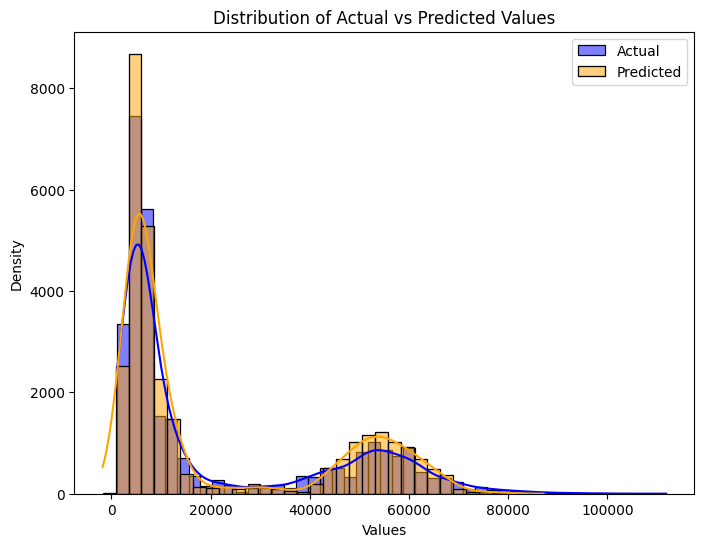

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True)
sns.histplot(y_test_pred, color='orange', label='Predicted', kde=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.show()


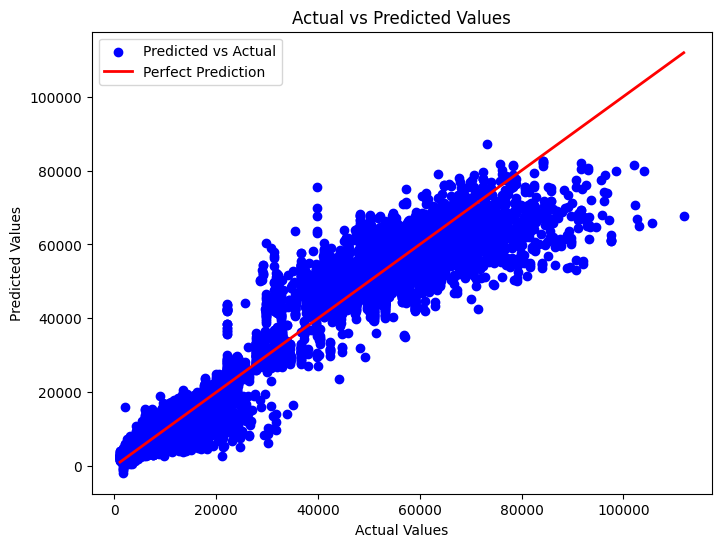

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Predicting the price by giving new values :

In [ ]:
from datetime import datetime

# Defining the columns that were label encoded
categorical_columns = ['airline', 'dep_time', 'from', 'stop', 'arr_time', 'to', 'class']

# Loading the label encoders
label_encoders = {}
for col in categorical_columns:
    with open(f'{col}_encoder.pkl', 'rb') as f:
        label_encoders[col] = pickle.load(f)

# New data
new_data = {
    'date': ['2024-09-10'],
    'airline': ['Indigo'],
    'dep_time': ['Evening'],
    'from': ['Chennai'],
    'stop': ['non-stop'],
    'arr_time': ['Afternoon'],
    'to': ['Banglore'],
    'class': ['Business'],
    'days_left': [30]
}

new_df = pd.DataFrame(new_data)

# Function to handle unseen categories
def transform_with_encoder(column, encoder):
    new_data_column = new_df[column].values
    if set(new_data_column).issubset(set(encoder.classes_)):
        return encoder.transform(new_data_column)
    else:
        transformed = np.full(new_data_column.shape, -1)  # Placeholder value for unseen categories
        for category in encoder.classes_:
            transformed[new_data_column == category] = encoder.transform([category])
        return transformed

# Applying label encoders to the new data
for col in categorical_columns:
    if col in new_df.columns:
        new_df[col] = transform_with_encoder(col, label_encoders[col])
    else:
        print(f"Column {col} is missing in new data.")

new_df['days_left'] = pd.to_numeric(new_df['days_left'], errors='coerce')

# Processng the 'date' column (example: convert it to ordinal or extract year, month, day)
new_df['date'] = pd.to_datetime(new_df['date']).apply(lambda x: x.toordinal())

# Drop 'time_taken' as it was dropped from the training data
if 'time_taken' in new_df.columns:
    new_df = new_df.drop(columns=['time_taken'])

# Ensure the order of columns in new_df matches the training data (X_train_val)
new_df = new_df[X_train_val.columns]

# Predicting the price
predicted_price = best_model.predict(new_df)
print("The predicted price is ", predicted_price)

The predicted price is  [25304.191]
